In [24]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [17]:
hadcrut = pd.read_csv(
    "~/Documents/hadcrut.txt",
    delim_whitespace=True,
    usecols=[0, 1],
    header=None
)

In [18]:
hadcrut['year'] = hadcrut.iloc[:, 0].apply(lambda x: x.split("/")[0]).astype(int)
hadcrut['month'] = hadcrut.iloc[:, 0].apply(lambda x: x.split("/")[1]).astype(int)

hadcrut = hadcrut.rename(columns={1: "value"})
hadcrut = hadcrut.iloc[:, 1:]

hadcrut.head()

,value,year,month
0,-0.700,1850,1
1,-0.286,1850,2
2,-0.732,1850,3
3,-0.563,1850,4
4,-0.327,1850,5


In [19]:
hadcrut = hadcrut.drop(hadcrut[hadcrut['year'] == 2019].index)

In [20]:
hadcrut = hadcrut.set_index(['year', 'month'])

In [21]:
hadcrut -= hadcrut.loc[1850:1900].mean()
hadcrut = hadcrut.reset_index()
hadcrut.head()

,year,month,value
0,1850,1,-0.386559
1,1850,2,0.027441
2,1850,3,-0.418559
3,1850,4,-0.249559
4,1850,5,-0.013559


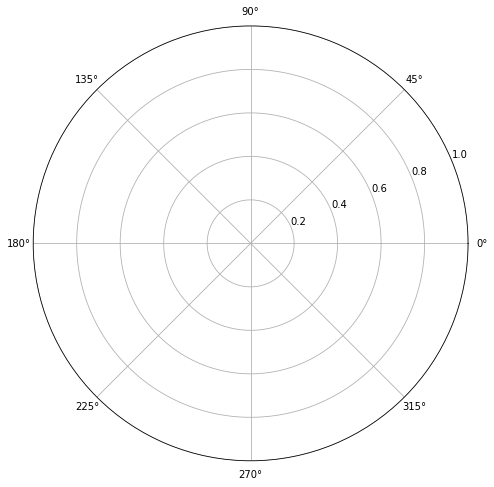

In [22]:
fig = plt.figure(figsize=(8,8))
ax1 = plt.subplot(111, projection='polar')

Text(0, 0, '1850')

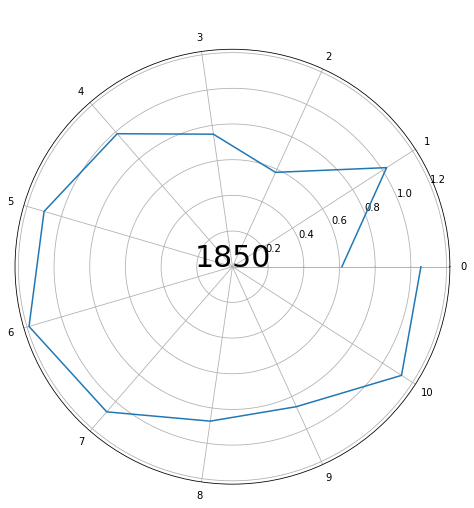

In [57]:
hc_1850 = hadcrut[hadcrut['year'] == 1850]

fig = plt.figure(figsize=(8,8))
ax1 = plt.subplot(111, projection='polar')

r = hc_1850['value'] + 1
theta = np.linspace(0, 2*np.pi, 12)
ax1.plot(theta, r)
ax1.set_xticks(np.pi/180. * np.linspace(0, 360, 12, endpoint=True))
#ax1.axes.get_yaxis().set_ticklabels([])
ax1.axes.get_xaxis().set_ticklabels(range(0, 11))

#fig.set_facecolor("#323331")
#ax1.set_facecolor('#000100')
ax1.set_title("Global Temperature Change (1850-2018)", color='white', fontdict={'fontsize': 20})
ax1.text(0,0,"1850", color='black', size=30, ha='center')



In [33]:
hadcrut['value'].max()

1.4244411764705882

In [34]:
ax1.set_ylim(0, 3.25)

(0, 3.25)

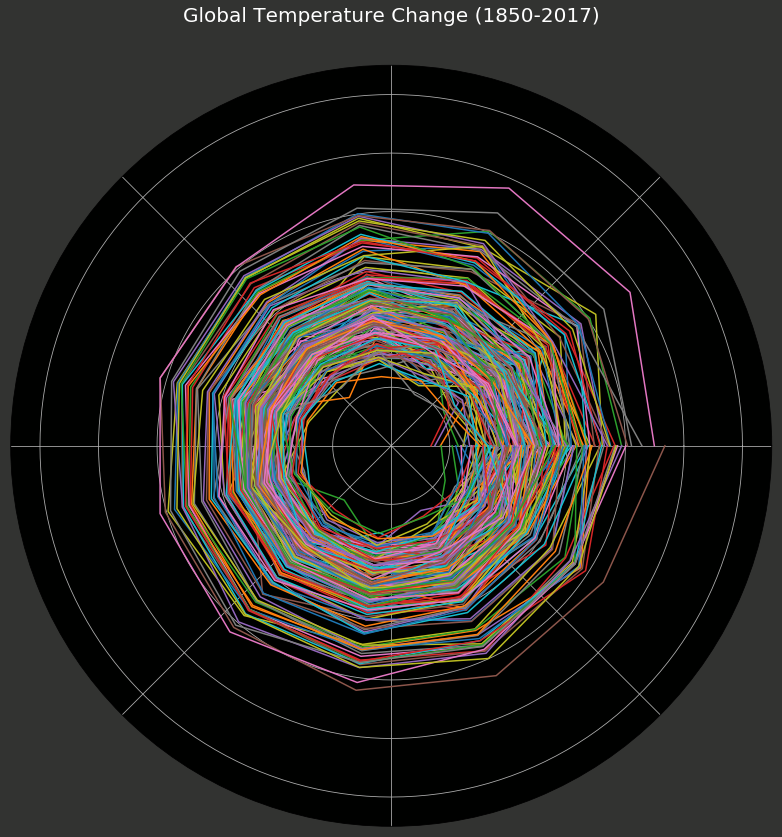

In [36]:
fig = plt.figure(figsize=(14,14))
ax1 = plt.subplot(111, projection='polar')

ax1.axes.get_yaxis().set_ticklabels([])
ax1.axes.get_xaxis().set_ticklabels([])
fig.set_facecolor("#323331")
ax1.set_ylim(0, 3.25)

theta = np.linspace(0, 2*np.pi, 12)

ax1.set_title("Global Temperature Change (1850-2017)", color='white', fontdict={'fontsize': 20})
ax1.set_facecolor('#000100')

years = hadcrut['year'].unique()

for year in years:
    r = hadcrut[hadcrut['year'] == year]['value'] + 1
#     ax1.text(0,0, str(year), color='white', size=30, ha='center')
    ax1.plot(theta, r)

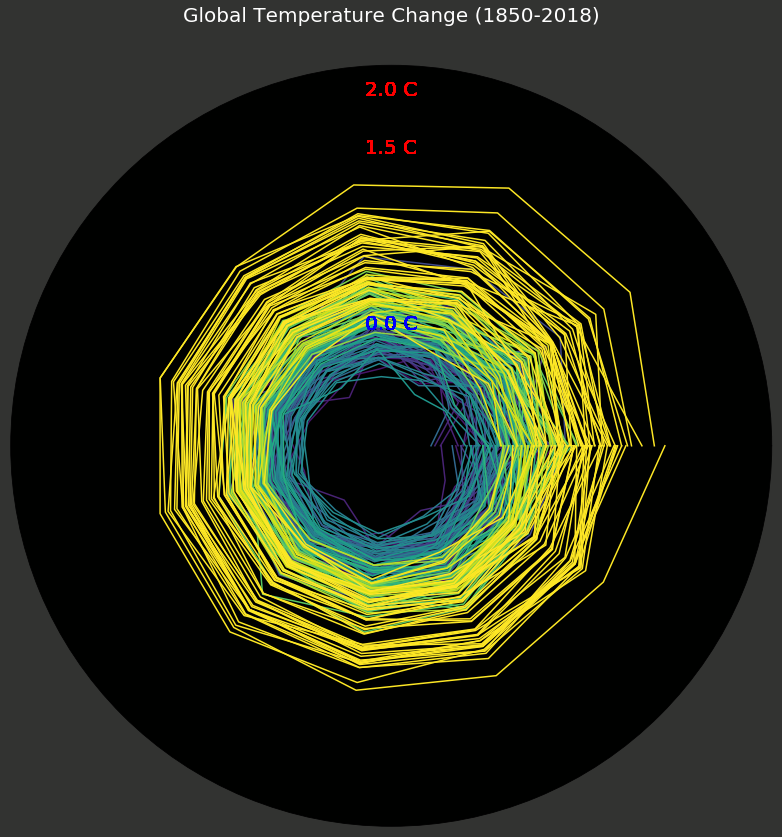

In [67]:
fig = plt.figure(figsize=(14,14))
ax1 = plt.subplot(111, projection='polar')

ax1.axes.get_yaxis().set_ticklabels([])
ax1.axes.get_xaxis().set_ticklabels([])
fig.set_facecolor("#323331")

for index, year in enumerate(years):
    r = hadcrut[hadcrut['year'] == year]['value'] + 1
    theta = np.linspace(0, 2*np.pi, 12)
    
    ax1.grid(False)
    ax1.set_title("Global Temperature Change (1850-2018)", color='white', fontdict={'fontsize': 20})
    
    ax1.set_ylim(0, 3.25)
    ax1.set_facecolor('#000100')
#     ax1.text(0,0, str(year), color='white', size=30, ha='center')
    ax1.plot(theta, r, c=plt.cm.viridis(index*2))
    ax1.text(np.pi/2, 1.0, "0.0 C", color="blue", ha='center', fontdict={'fontsize': 20})
    ax1.text(np.pi/2, 2.5, "1.5 C", color="red", ha='center', fontdict={'fontsize': 20})
    ax1.text(np.pi/2, 3.0, "2.0 C", color="red", ha='center', fontdict={'fontsize': 20})

In [ ]:
import sys
from matplotlib.animation import FuncAnimation

# Create the base plot
fig = plt.figure(figsize=(8,8))
ax1 = plt.subplot(111, projection='polar')
full_circle_thetas = np.linspace(0, 2*np.pi, 1000)
blue_line_one_radii = [1.0]*1000
red_line_one_radii = [2.5]*1000
red_line_two_radii = [3.0]*1000
ax1.plot(full_circle_thetas, blue_line_one_radii, c='blue')
ax1.plot(full_circle_thetas, red_line_one_radii, c='red')
ax1.plot(full_circle_thetas, red_line_two_radii, c='red')
ax1.axes.get_yaxis().set_ticklabels([])
ax1.axes.get_xaxis().set_ticklabels([])
fig.set_facecolor("#323331")
theta = np.linspace(0, 2*np.pi, 12)
ax1.grid(False)
ax1.set_title("Global Temperature Change (1850-2018)", color='white', fontdict={'fontsize': 20})
ax1.set_ylim(0, 3.25)
ax1.set_facecolor('#000100')

def update(i):
    # Specify how we want the plot to change in each frame.
    # We need to unravel the for loop we had earlier.
    year = years[i]
    r = hadcrut[hadcrut['year'] == year]['value'] + 1
    for txt in ax1.texts:
        txt.set_visible(False)
    ax1.text(0, 0, year, color='white', size=20, ha='center')
    ax1.text(np.pi/2, 1.0, "0.0 C", color="blue", ha='center', fontdict={'fontsize': 20})
    ax1.text(np.pi/2, 2.5, "1.5 C", color="red", ha='center', fontdict={'fontsize': 20})
    ax1.text(np.pi/2, 3.0, "2.0 C", color="red", ha='center', fontdict={'fontsize': 20})
    ax1.plot(theta, r, c=plt.cm.viridis(i*2))
    return ax1

anim = FuncAnimation(fig, update, frames=len(years), interval=50)

anim.save('climate_spiral.gif', dpi=120, writer='imagemagick', savefig_kwargs={'facecolor': '#323331'})